## Import necessary libraries

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

## Read all file names

In [150]:
pwd

'C:\\Users\\DELL\\Desktop\\FEBA\\DATA SCIENCE\\IMAGE PROCESSING\\Capstone project 1 image processing\\Capstone project 1 image processing'

In [152]:
cat=glob.glob("archive (3)/afhq/test/cat/*.jpg")
dog=glob.glob("archive (3)/afhq/test/dog/*.jpg")
wild=glob.glob("archive (3)/afhq/test/wild/*.jpg")

In [154]:
len(cat)

75

In [156]:
len(dog)

44

In [158]:
len(wild)

44

## Read image data from all files and store it in a variable.Store the label as well

In [161]:
image =[]
label=[]
for i in cat:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

for i in dog:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

for i in wild:
    img=plt.imread(i)
    image.append(img)
    label.append(2)

## Plot some of the images

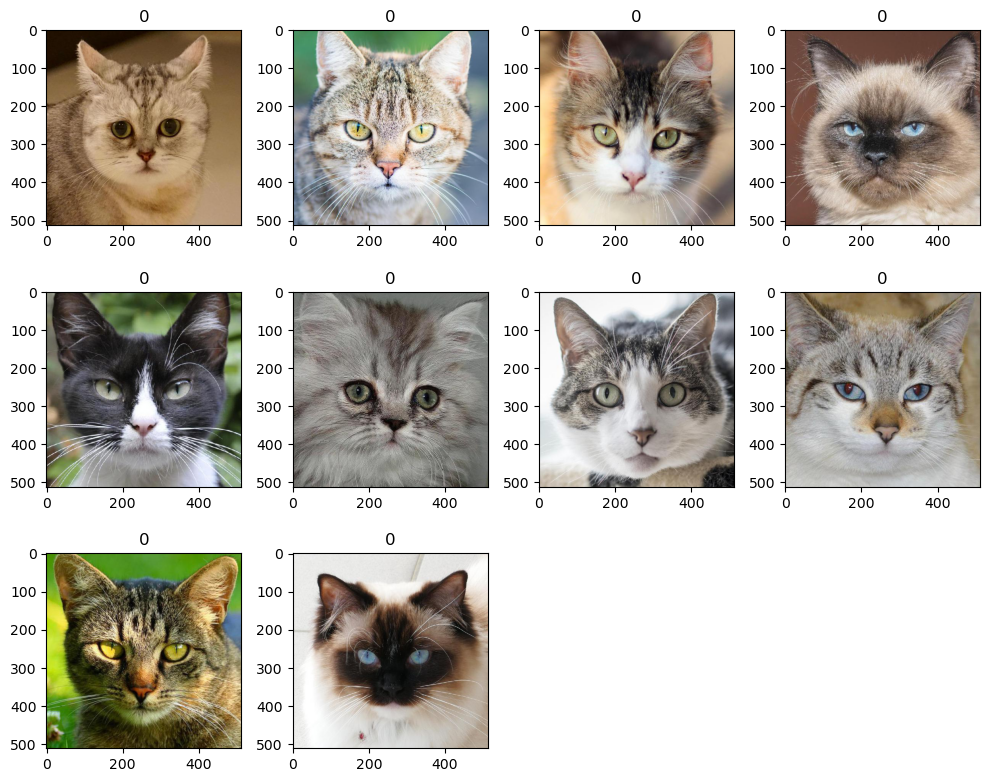

In [163]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label[i])
plt.tight_layout()

## Shuffle images and labels

In [166]:
image, label = shuffle(image, label)

## Plot the images once again

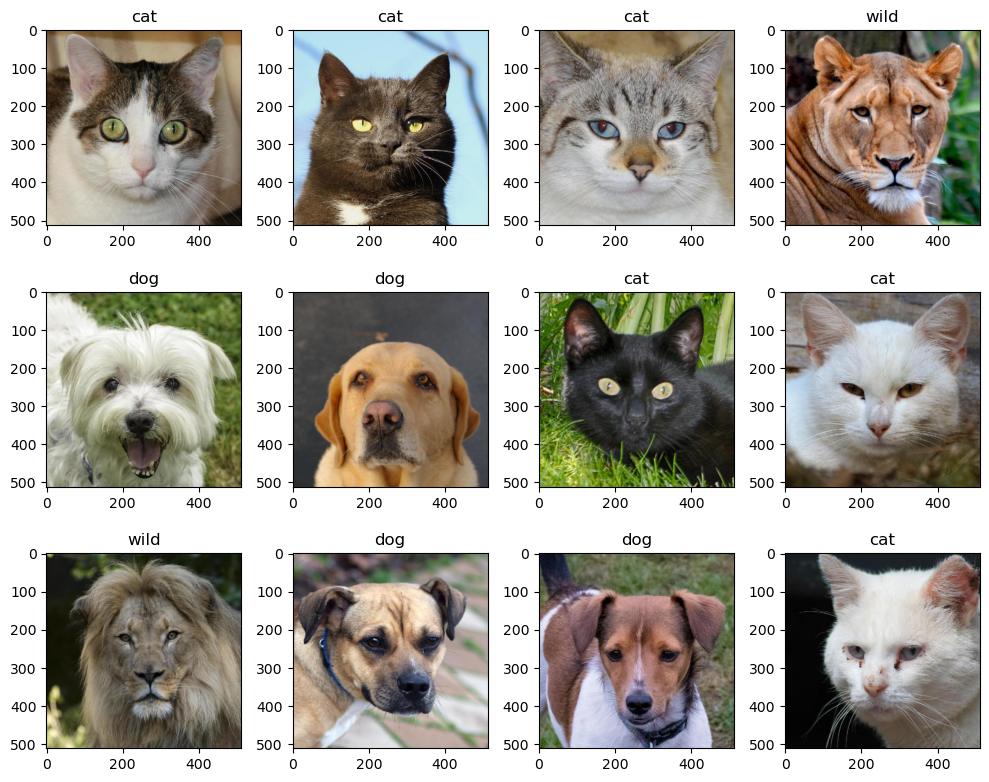

In [168]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] ==0:
        plt.title('cat')
    elif label[i]==1:
        plt.title('dog')
    else:
       plt.title('wild')
plt.tight_layout()

## Check the shape of some of the images

In [172]:
for i in range(10):
    print(image[i].shape)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


In [173]:
x=[]
for i in image:
    x.append(resize(i, (500,500,3)))


## Convert images and labels to numpy array and store them as x and y variables

In [175]:
x= np.array(x)

In [176]:
y=np.array(label)

## Reshape the images to 1 dimension

In [183]:
d1,d2,d3,d4=x.shape

In [185]:
x=x.reshape((d1,d2*d3*d4))

## Train test Split

In [188]:
from sklearn.model_selection import train_test_split

In [190]:
x_train,x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2)

## Create SVM Model and train it

In [193]:
from sklearn.svm import SVC

In [195]:
model=SVC()

In [197]:
%time model.fit(x_train,y_train)

CPU times: total: 32.1 s
Wall time: 19.2 s


SVC()

## Make predictions with x_test

In [199]:
%time y_pred=model.predict(x_test)

CPU times: total: 33.6 s
Wall time: 17.6 s


## Evaluate the model

In [205]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [207]:
accuracy_score(y_test,y_pred)

0.696969696969697

In [ ]:
sns.heatmap(confusi